## SurfinPy

#### Tutorial 1 - Generating a phase diagram as a function of chemical potential and surface energy at 0 K

In this tutorial we will learn how to generate a basic phase diagram from DFT energies. This example will consider a series of surfaces that contain differing amounts of surface oxygen and adsorbed water species. 
The physical quantity that is used to define the stability of a surface with a given composition is its surface energy $\gamma$ (J $m^{-2}$). Going forward in this tutorial we will use the example of water adsorbing on to defective Ti$O_2$ surfaces.

\begin{align}
\gamma_{Surf} & = \frac{1}{2A} \Bigg( E_{TiO_2}^{slab} - \frac{nTi_{slab}}{nTi_{Bulk}} E_{TiO_2}^{Bulk} \Bigg) - \Gamma_O \mu_O - \Gamma_{H_2O} \mu_{H_2O} ,
\end{align}

where A is the surface area, $E_{TiO_2}^{slab}$ is the DFT energy of the slab, $nTi_{Slab}$ is the number of cations in the slab, $nTi_{Bulk}$ is the number of cations in the bulk unit cell, $E_{TiO_2}^{Bulk}$ is the DFT energy of the bulk unit cell and

\begin{align}
\Gamma_O & = \frac{1}{2A} \Bigg( nO_{Slab} - \frac{nO_{Bulk}}{nTi_{Bulk}}nTi_{Slab}  \Bigg) ,
\end{align}

\begin{align}
\Gamma_{H_2O} & = \frac{nH_2O}{2A} ,
\end{align}

where $nO_{Slab}$ is the number of anions in the slab, $nO_{Bulk}$ is the number of anions in the bulk and $nH_2O$ is the number of adsorbing water molecules. $\Gamma_O$ / $\Gamma_{H_2O}$ is the excess oxygen / water at the surface and $\mu_O$ / $\mu_{H_2O}$ is the oxygen / water chemcial potential. Clearly $\Gamma$ and $\mu$ will only matter when the surface is non stoichiometric. 

So now lets work through an example

In [1]:
import matplotlib.pyplot as plt
from surfinpy import mu_vs_mu
from surfinpy import data

The first thing to do is input the data that we have generated from our DFT simulations. The input data needs to be contained within a `surfinpy.data` object. First we have created a `surfinpy.data.ReferenceDataSet` object for the bulk data (reference data), where `cation` is the number of cations, `anion` is the number of anions, `energy` is the DFT energy and `funits` is the number of formula units.

In [2]:
bulk = data.ReferenceDataSet(cation = 1, anion = 2, energy = -780.0, funits = 4)

Next we create the surface `surfinpy.data.DataSet` objects - one for each surface or "phase". `cation` is the number of cations, `x` is in this case the number of oxygen species (corresponding to the X axis of the phase diagram), `y` is the number of in this case water molecules (corresponding to the Y axis of our phase diagram), `area` is the surface area, `energy` is the DFT energy, `label` is the label for the surface (appears on the phase diagram) and finally `nSpecies` is the number of adsorbin species.


In [3]:
pure = data.DataSet(cation = 24, x = 48, y = 0, area = 60.0, energy = -575.0, label = "0.00 $TiO_2$", nspecies = 1)
H2O = data.DataSet(cation = 24, x = 48, y = 2, area = 60.0, energy = -612.0, label = "0.16 $TiO_2$", nspecies = 1)
H2O_2 = data.DataSet(cation = 24, x = 48, y = 4, area = 60.0, energy = -640.0, label = "0.32 $TiO_2$", nspecies = 1)
H2O_3 = data.DataSet(cation = 24, x = 48, y = 8, area = 60.0, energy = -676.0, label = "0.64 $TiO_2$", nspecies = 1)
Vo = data.DataSet(cation = 24, x = 46, y = 0, area = 60.0, energy = -558.0, label = "0.00 $TiO_1.9$", nspecies = 1)
H2O_Vo_1 = data.DataSet(cation = 24, x = 46, y = 2, area = 60.0, energy = -594.0, label = "0.00 $TiO_1.9$", nspecies = 1)
H2O_Vo_2 = data.DataSet(cation = 24, x = 46, y = 4, area = 60.0, energy = -624.0, label = "0.16 $TiO_1.9$", nspecies = 1)
H2O_Vo_3 = data.DataSet(cation = 24, x = 46, y = 6, area = 60.0, energy = -640.0, label = "0.32 $TiO_1.9$", nspecies = 1)
H2O_Vo_4 = data.DataSet(cation = 24, x = 46, y = 8, area = 60.0, energy = -670.0, label = "0.64 $TiO_1.9$", nspecies = 1)

Next we need to create a list of our data. Don't worry about the order, surfinpy will sort that out for you.  

In [4]:
data = [pure, Vo, H2O, H2O_Vo_1, H2O_2, H2O_Vo_2, H2O_3, H2O_Vo_3,  H2O_Vo_4]

We now need to generate our X and Y axis, or more appropriately, our chemical potential values. Again these exist in a dictionary. 'Range' corresponds to the range of chemcial potential values to be considered and 'Label' is the axis label.
```
    deltaX = {'Range': Range of Chemical Potential,
              'Label': Species Label}
              
```

In [5]:
deltaX = {'Range': [ -12, -6],  'Label': 'O'}
deltaY = {'Range': [ -19, -12], 'Label': 'H_2O'}

And finally we can generate our plot using these 4 variables of data. 

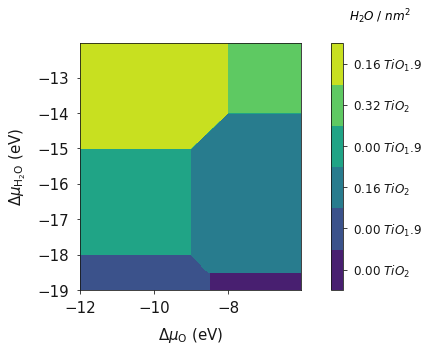

In [6]:
system = mu_vs_mu.calculate(data, bulk, deltaX, deltaY)
ax = system.plot_phase(cbar_title="$H_2O$ $/$ $nm^2$", figsize=(6, 5))
plt.savefig("../../../docs/source/Figures/Surfaces_1.png", dpi=600)

This plot is a good start in that the relative stability of the surfaces has been evaluated. However the chemical potential values are essentially meaningless and can be dependent on the pseudopotentials. The first thing that we can do is add in the DFT energy of species X/Y, this will give us a 0K phase diagram.

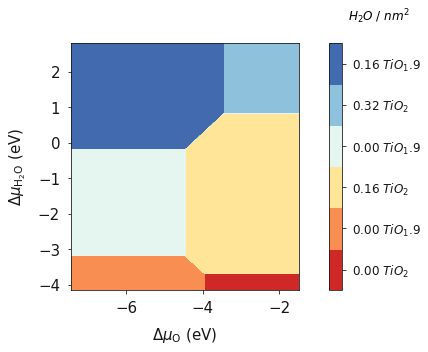

In [7]:
Zero_K = mu_vs_mu.calculate(data, bulk, deltaX, deltaY, x_energy=-4.54, y_energy=-14.84)
ax = Zero_K.plot_phase(colourmap="RdYlBu", cbar_title="$H_2O$ $/$ $nm^2$", figsize=(6, 5))
plt.savefig("../../../docs/source/Figures/Surfaces_2.png", dpi=600)